In [1]:

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.cm import *
#matplotlib.rcParams['figure.dpi'] = 144
 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import numpy as np
from PIL import Image

import urllib
import requests

Load the survey data.

In [2]:
import pandas as pd

df_survey = pd.read_csv('master_csv/ThePrideProjectSurvey_cleaned.csv')

df_survey.head()

,NumGames,favteam,lgbtq,teamHadPride,Went,WouldGo,Ad_opinion,pregame_opinion,in_game_features_opinion,swag_opinion,overall_opinion,fav_promo
0,1 to 5,Washington Nationals,No,Yes,I attended specifically because it was Pride N...,Pride Night would not influence my choice of game,Just the right amount,Just the right amount,Just the right amount,"Did some, but not enough",".Nats Park does a good job, it’s always during...",Nats Park Pride with my BFF gay who’s a hardco...
1,1 to 5,St. Louis Cardinals,No,Yes,"Didn't attend, but not because of Pride Night",I would go out of my way to attend on Pride Night,Just the right amount,Don't know/unaware of this feature,Don't know/unaware of this feature,Just the right amount,They’re great,I haven’t attended any
2,6 to 10,Atlanta Braves,No,Yes,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Just the right amount,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,I'm all for inclusion and hope it brings fans ...,"Star Wars Night, but themed nights don't reall..."
3,1 to 5,New York Yankees,No,I don't know,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,Don't know/unaware of this feature,Don’t care,Don’t know
4,1 to 5,St. Louis Cardinals,Yes,I don't know,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Just the right amount,Just the right amount,Don't know/unaware of this feature,Just the right amount,Very cool,Bring your dog to the park.


## Create a subset of the data and tidy it up. 

In [3]:
df_survey.columns

Index(['NumGames', 'favteam', 'lgbtq', 'teamHadPride', 'Went', 'WouldGo',
       'Ad_opinion', 'pregame_opinion', 'in_game_features_opinion',
       'swag_opinion', 'overall_opinion', 'fav_promo'],
      dtype='object')

In [4]:
df_survey_2 = df_survey[["favteam","lgbtq","Went","WouldGo", "overall_opinion"]]

df_survey_2.head()

,favteam,lgbtq,Went,WouldGo,overall_opinion
0,Washington Nationals,No,I attended specifically because it was Pride N...,Pride Night would not influence my choice of game,".Nats Park does a good job, it’s always during..."
1,St. Louis Cardinals,No,"Didn't attend, but not because of Pride Night",I would go out of my way to attend on Pride Night,They’re great
2,Atlanta Braves,No,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,I'm all for inclusion and hope it brings fans ...
3,New York Yankees,No,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Don’t care
4,St. Louis Cardinals,Yes,"Didn't attend, but not because of Pride Night",Pride Night would not influence my choice of game,Very cool


In [5]:
#rename the columns
  
df_survey_2.columns = ['favteam', 'lgbtq','went', 'wouldgo','overall_impression'] 
print(df_survey_2.columns) 

Index(['favteam', 'lgbtq', 'went', 'wouldgo', 'overall_impression'], dtype='object')


Data Cleaning

In [6]:
#create new DF's for the most polarized survey responses
wouldgo_df= df_survey_2[df_survey_2.wouldgo == 'I would go out of my way to attend on Pride Night']
wouldavoid_df= df_survey_2[df_survey_2.wouldgo == 'I would go out of my way to avoid Pride Night']



In [7]:
#process the text column

text = " ".join(comment for comment in wouldgo_df.overall_impression)
text2 = " ".join(comment for comment in wouldavoid_df.overall_impression)

print ("There are {} words in the combination of all the positive comments.".format(len(text)))
print ("There are {} words in the combination of all the negative comments.".format(len(text2)))



There are 10905 words in the combination of all the positive comments.
There are 7396 words in the combination of all the negative comments.


In [8]:
#create the stop words

stopwords = set(STOPWORDS)
stopwords.update(["mlb", "now","baseball","game","night","event","peope","want","games","pride","theme","one",
                  "need","think","lgbtq","a","team","leave","thing","see","care","go","attempt","believe","people"])

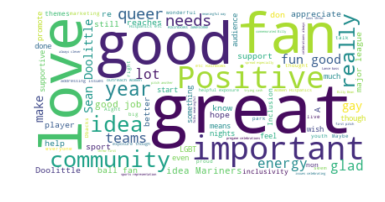

In [9]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=1500).generate(text)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

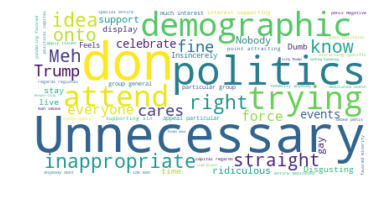

In [10]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=1500).generate(text2)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### inject the word clouds into the shape masks, apply stying, and save the image

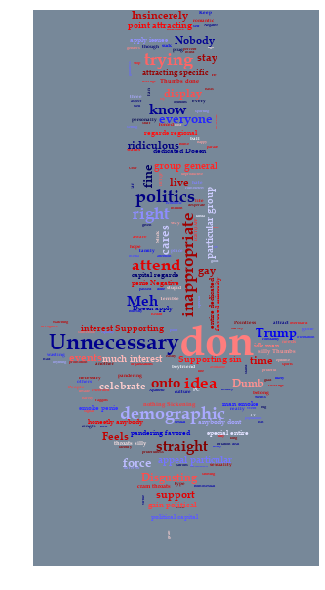

In [11]:


words = text2
mask = np.array(Image.open(requests.get('https://comps.gograph.com/ggb/100814068', stream=True).raw))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 300, height = 330, background_color='lightslategray',relative_scaling=0.55, 
                           colormap=seismic, font_path='c:\Windows\Fonts\Antquab.ttf', 
                           stopwords=stopwords, repeat=True, mask=mask).generate(words)
    plt.figure(figsize=(8,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('negative_words.jpg')
    plt.show()
    
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)

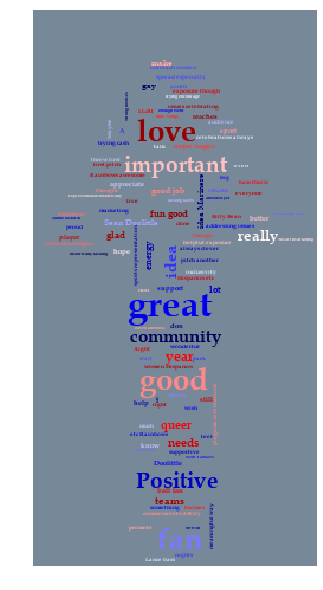

In [12]:
words = text
mask = np.array(Image.open('shapes/up_arrow.jpg'))

# This function takes in your text and your mask and generates a wordcloud. 
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 300, height = 330, background_color='lightslategray',relative_scaling=0.55, 
                           colormap=seismic, font_path='c:\Windows\Fonts\Antquab.ttf', 
                           stopwords=stopwords, repeat=True, mask=mask).generate(words)
    plt.figure(figsize=(8,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.savefig('positive_words.jpg')
    plt.show()
    
    
#Run the following to generate your wordcloud
generate_wordcloud(words, mask)